# Passenger numbers (cruises)

## Kiel Harbour

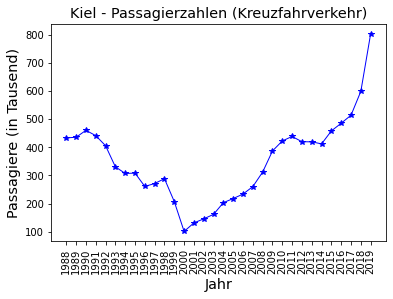

In [1]:
import io
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_URL = 'https://www.kiel.de/opendata/kiel_transport_verkehr_hafen_passagiere_insgesamt.csv'

csv_data = requests.get(CSV_URL).content

df = pd.read_csv(io.StringIO(csv_data.decode("utf-8")), sep=";")

# Show first 5 rows
# print(df.head())

# Create a subplot
fig, ax = plt.subplots()

df_cleaned = df.dropna(how="all")

# Unsigned integer (0 to 65535)
df_years = df_cleaned["Jahr"].astype(np.uint16)

x = df_years.values
y = df_cleaned["im Kreuzfahrverkehr"].values

plt.title("Kiel - Passagierzahlen (Kreuzfahrverkehr)", size="x-large")
plt.ylabel("Passagiere (in Tausend)", size="x-large")
plt.xlabel("Jahr", size="x-large")

plt.plot(y, "*-", markersize=6, linewidth=1, color="b")

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation="vertical")

plt.show()